We will try to explore the dataset.We will be using deep learing to classify wine into different categories.We will be using Keras for out work.This kernel is a work in process.If you like my work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/principal-component-analysis/Wine.csv


### Importing the Python Modules

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Importing the data

In [3]:
df = pd.read_csv('../input/principal-component-analysis/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.22,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Creating Matrix of Target Values 

In [4]:
y = df['Customer_Segment']

Customer Segement represents the class of the wine.This is out target variable which we will be predicting using Deep learning algorithm.

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

We can see that the wine is categorised into three class based on the customer choice.

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
y_cat.head()

,1,2,3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


So we have converted our target y into three columns of data which will be input to out Deep Learning Model.

### Creating Matrix Of Features

In [8]:
X = df.drop('Customer_Segment',axis=1)

In [9]:
X.shape

(178, 13)

### Pair Plot

In [10]:
import seaborn as sns

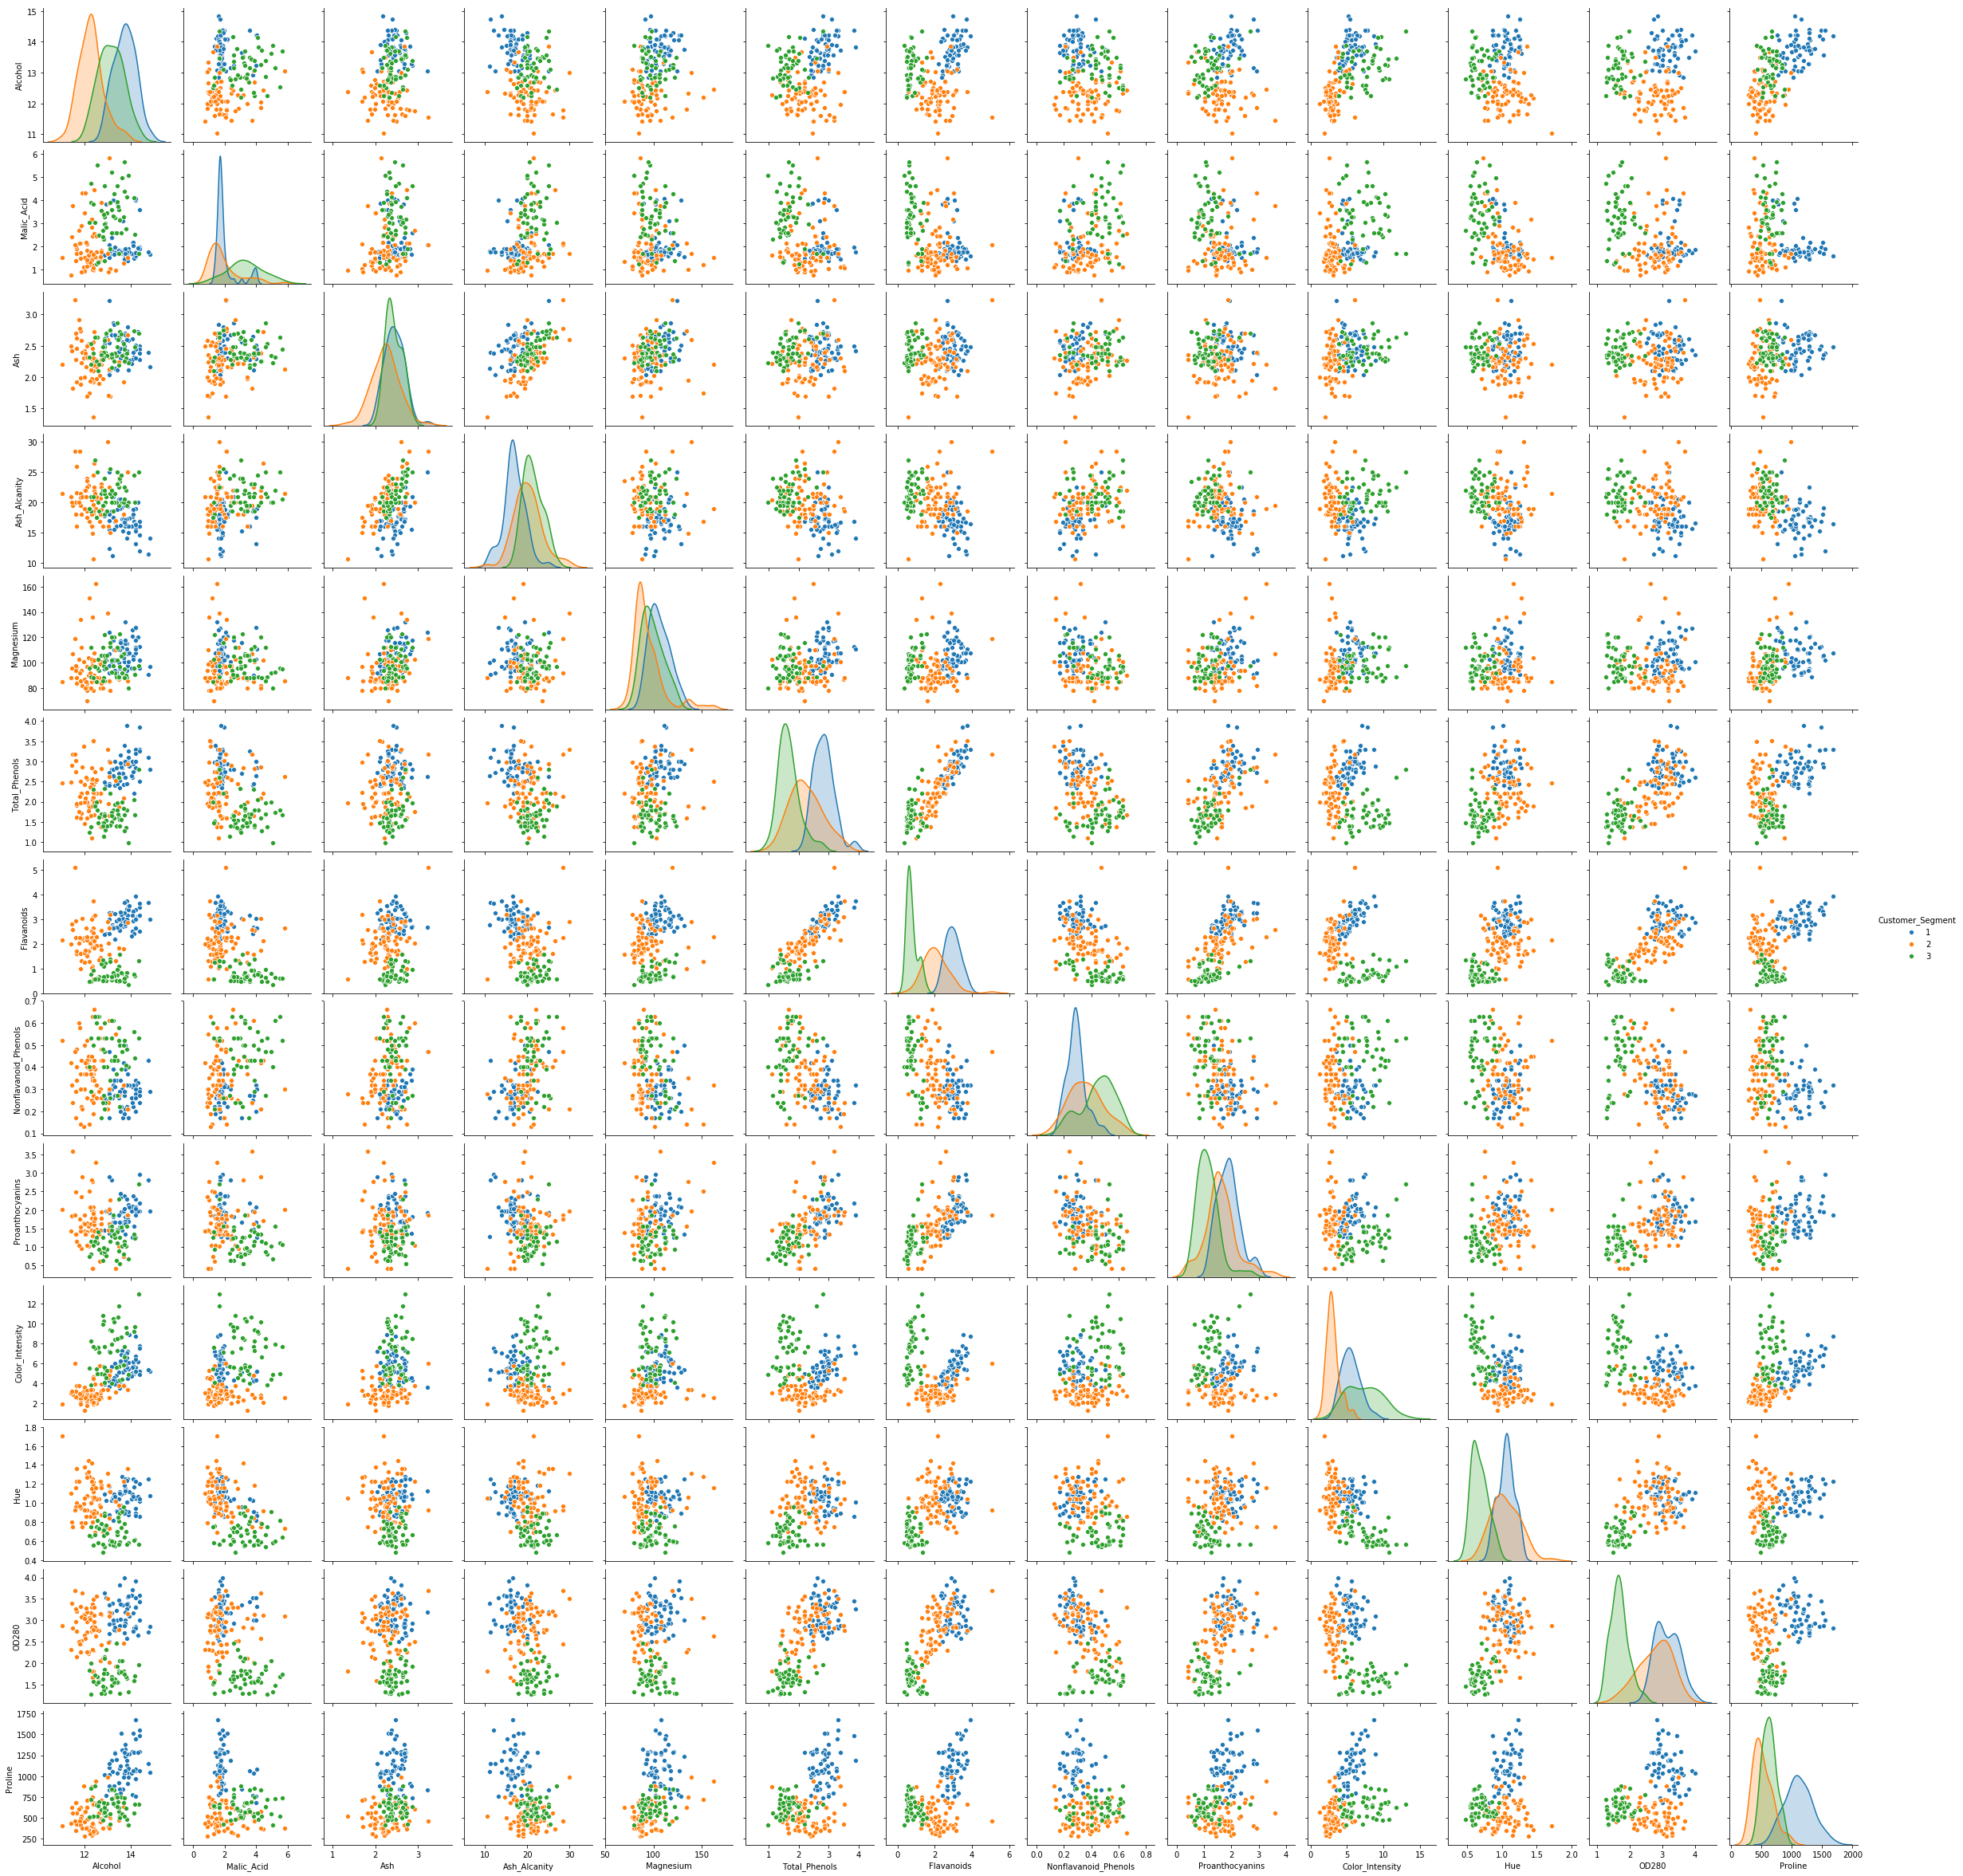

In [11]:
sns.pairplot(df,hue = 'Customer_Segment');

In most of the plots we can see a clear separation between the three classes.Our Deep learning model would in in poistion to give good level of accuracy whicle predicting the class of the wine.

### Scaling the Features

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xsc = sc.fit_transform(X)

### Building the Neural Network

In [13]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

Using TensorFlow backend.


In [14]:
K.clear_session()
model = Sequential()
model.add(Dense(5,input_shape=(13,),kernel_initializer = 'he_normal',activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))

model.compile(RMSprop(lr=0.1),'categorical_crossentropy',metrics = ['accuracy'])

model.fit(Xsc,y_cat.values,batch_size=8,epochs=10,verbose=1,validation_split=0.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8592 - val_loss: 0.0247 - val_accuracy: 1.0000
Epoch 2/10
142/142 [==============================] - 0s 169us/step - loss: 0.1132 - accuracy: 0.9648 - val_loss: 0.2818 - val_accuracy: 0.8611
Epoch 3/10
142/142 [==============================] - 0s 165us/step - loss: 0.0484 - accuracy: 0.9789 - val_loss: 0.0572 - val_accuracy: 0.9722
Epoch 4/10
142/142 [==============================] - 0s 163us/step - loss: 0.0344 - accuracy: 0.9859 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 5/10
142/142 [==============================] - 0s 158us/step - loss: 0.0473 - accuracy: 0.9930 - val_loss: 1.7550e-06 - val_accuracy: 1.0000
Epoch 6/10
142/142 [==============================] - 0s 160us/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 8.6079e-04 - val_accuracy: 1.0000
Epoch 7/10
142/142 [==============================] - 0s 159us/step - loss: 0.0085 - 

### Defining feature fuction to check data Seperation

In [15]:
K.clear_session()
model = Sequential()
model.add(Dense(8,input_shape=(13,),kernel_initializer = 'he_normal',activation = 'tanh'))
model.add(Dense(5,kernel_initializer = 'he_normal',activation = 'tanh'))
model.add(Dense(2,kernel_initializer = 'he_normal',activation = 'tanh'))
model.add(Dense(3,activation = 'softmax'))


model.compile(RMSprop(lr=0.05),'categorical_crossentropy',metrics = ['accuracy'])

model.fit(Xsc,y_cat.values,batch_size=16,epochs=20,verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 665us/step - loss: 0.4708 - accuracy: 0.8933
Epoch 2/20
178/178 [==============================] - 0s 85us/step - loss: 0.1451 - accuracy: 0.9831
Epoch 3/20
178/178 [==============================] - 0s 86us/step - loss: 0.0784 - accuracy: 0.9775
Epoch 4/20
178/178 [==============================] - 0s 86us/step - loss: 0.0509 - accuracy: 0.9944
Epoch 5/20
178/178 [==============================] - 0s 82us/step - loss: 0.0175 - accuracy: 1.0000
Epoch 6/20
178/178 [==============================] - 0s 84us/step - loss: 0.0099 - accuracy: 1.0000
Epoch 7/20
178/178 [==============================] - 0s 87us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 8/20
178/178 [==============================] - 0s 87us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 9/20
178/178 [==============================] - 0s 86us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/20
178/178 [==============================] - 0s 87us/step - loss: 0.0012 - accur

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


We are going to extract the values at dens_3 and plot it on a 2D graph to show the seperation.

In [17]:
inp = model.layers[0].input
out = model.layers[2].output

In [18]:
features_function = K.function([inp],[out])

In [19]:
features = features_function([Xsc])[0]

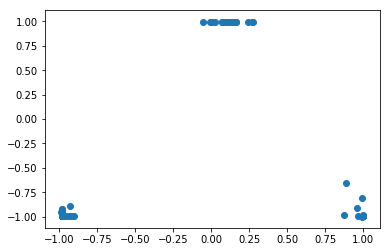

In [20]:
plt.scatter(features[:,0],features[:, 1])

We can see there there is a clear seperation of the three categories.Neural Networks are very good feature Learners.